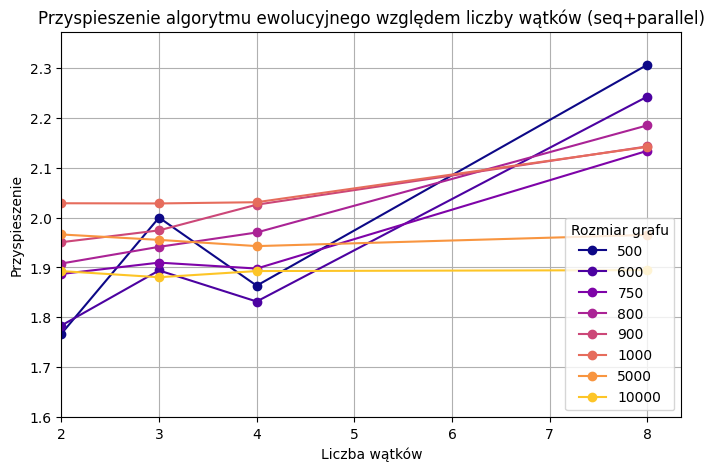

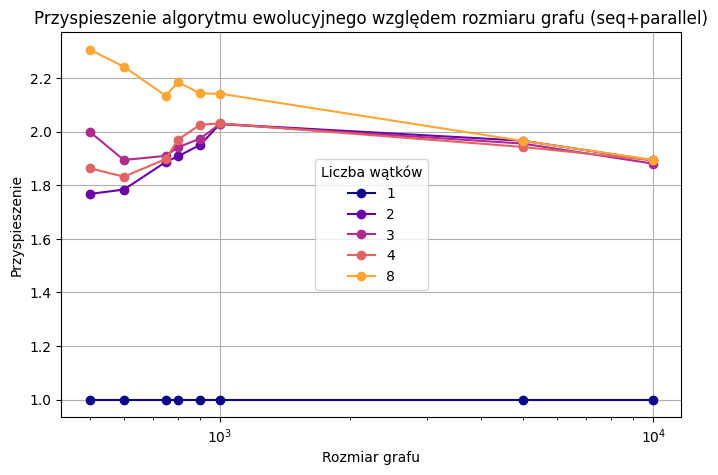

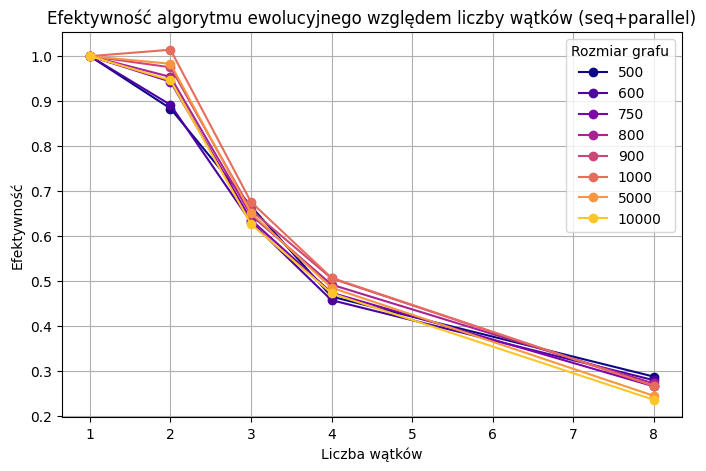

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")

df["Speedup"] = 0.0
for graph_size in df["GraphSize"].unique():
    graph_df = df[df["GraphSize"] == graph_size]
    
    baseline_time = graph_df[graph_df["Threads"] == 1]["Time(ms)"].values[0]
    df.loc[df["GraphSize"] == graph_size, "Speedup"] = baseline_time / df["Time(ms)"]

df["Efficiency"] = df["Speedup"] / df["Threads"]

# Wykres 1 - Przyspieszenie względem rozmiaru grafu
plt.figure(figsize=(8, 5))
cmap = plt.get_cmap("plasma") 
for i, graph_size in enumerate(df["GraphSize"].unique()):
    graph_df = df[df["GraphSize"] == graph_size]
    plt.plot(graph_df["Threads"], graph_df["Speedup"], marker='o', label=f'{graph_size}', color=cmap(i / len(df["GraphSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie algorytmu ewolucyjnego względem liczby wątków (seq+parallel)")
plt.legend(title="Rozmiar grafu")
plt.xlim(left=2)
plt.ylim(bottom=1.6)
plt.grid()
plt.show()

# Wykres 2 - Rysowanie wykresu przyspieszenia względem wielkości grafu
plt.figure(figsize=(8, 5))
for i, threads in enumerate(df["Threads"].unique()):
    thread_df = df[df["Threads"] == threads]
    plt.plot(thread_df["GraphSize"], thread_df["Speedup"], marker='o', label=f'{threads}', color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar grafu")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie algorytmu ewolucyjnego względem rozmiaru grafu (seq+parallel)")
plt.legend(title="Liczba wątków")
plt.grid()
plt.xscale('log')
plt.show()

# Wykres 3 - Efektywność względem rozmiaru grafu
plt.figure(figsize=(8, 5))
for i, graph_size in enumerate(df["GraphSize"].unique()):
    graph_df = df[df["GraphSize"] == graph_size]
    plt.plot(graph_df["Threads"], graph_df["Efficiency"], marker='o', label=f'{graph_size}', color=cmap(i / len(df["GraphSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Efektywność")
plt.title("Efektywność algorytmu ewolucyjnego względem liczby wątków (seq+parallel)")
plt.legend(title="Rozmiar grafu")
plt.grid()
plt.show()


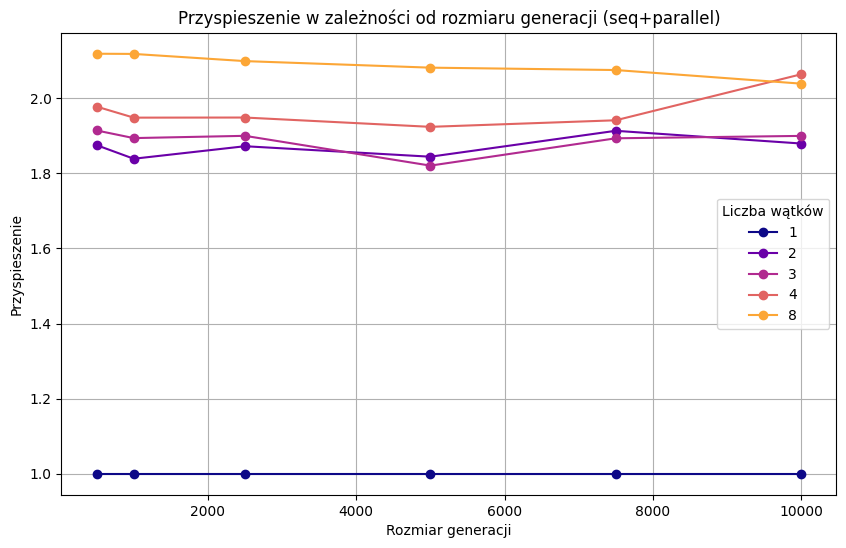

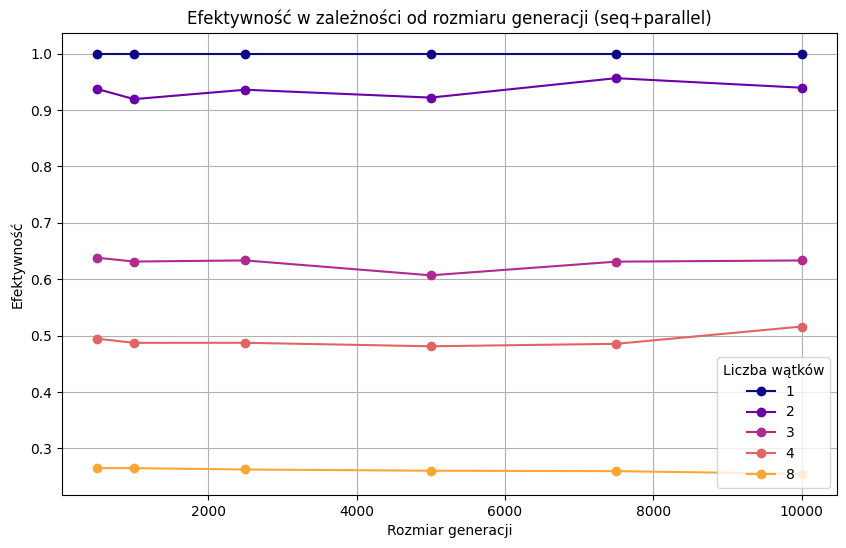

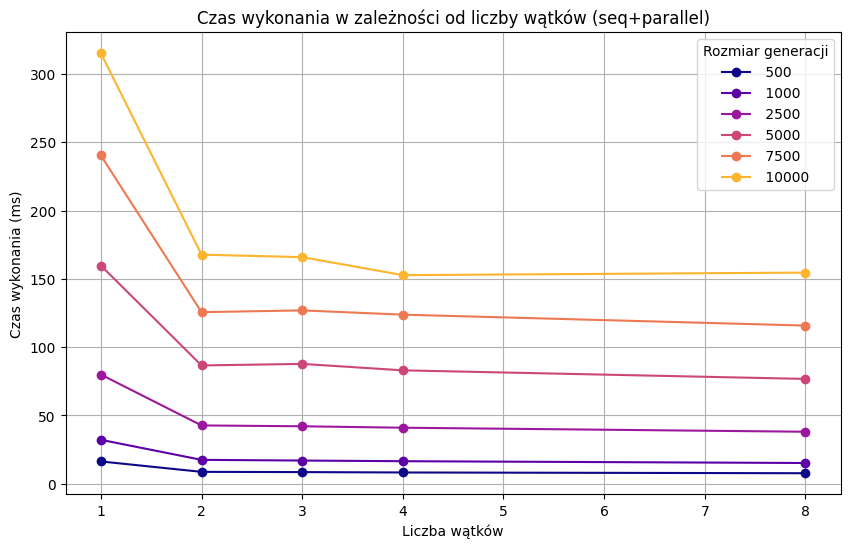

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("results_generation_seq_parallel.csv")

df_T1 = df[(df["Threads"] == 1)][["GenerationSize", "ExecutionTime"]]
df_T1.rename(columns={"ExecutionTime": "T1"}, inplace=True)

df = df.merge(df_T1, on="GenerationSize", how="left")

df["Speedup"] = df["T1"] / df["ExecutionTime"]

df["Efficiency"] = df["Speedup"] / df["Threads"]

# WYKRES 1: Przyspieszenie w zależności od rozmiaru generacji 
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap("plasma")  
for i, threads in enumerate(sorted(df["Threads"].unique())):
    subset = df[df["Threads"] == threads]
    plt.plot(subset["GenerationSize"], subset["Speedup"], marker='o', color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar generacji")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie w zależności od rozmiaru generacji (seq+parallel)")
plt.legend([f"{threads}" for threads in sorted(df["Threads"].unique())], title="Liczba wątków", loc="best")
plt.grid(True)
plt.show()

# WYKRES 2: Efektywność w zależności od rozmiaru generacji 
plt.figure(figsize=(10, 6))
for i, threads in enumerate(sorted(df["Threads"].unique())):
    subset = df[df["Threads"] == threads]
    plt.plot(subset["GenerationSize"], subset["Efficiency"], marker='o', color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar generacji")
plt.ylabel("Efektywność")
plt.title("Efektywność w zależności od rozmiaru generacji (seq+parallel)")
plt.legend([f"{threads} " for threads in sorted(df["Threads"].unique())], title="Liczba wątków", loc="best")
plt.grid(True)
plt.show()

# WYKRES 3: Czas wykonania w zależności od liczby wątków 
plt.figure(figsize=(10, 6))
for i, generation_size in enumerate(sorted(df["GenerationSize"].unique())):
    subset = df[df["GenerationSize"] == generation_size]
    plt.plot(subset["Threads"], subset["ExecutionTime"]/1000, marker='o', color=cmap(i / len(df["GenerationSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Czas wykonania (ms)")
plt.title("Czas wykonania w zależności od liczby wątków (seq+parallel)")
plt.xticks(np.arange(min(df["Threads"]), max(df["Threads"]) + 1, 1)) 
plt.legend([f" {generation_size}" for generation_size in sorted(df["GenerationSize"].unique())], title="Rozmiar generacji", loc="best")
plt.grid(True)
plt.show()



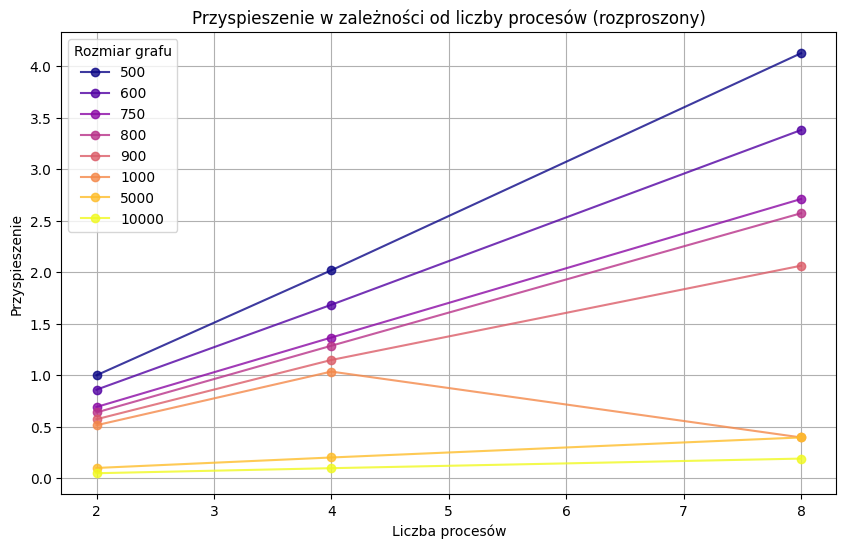

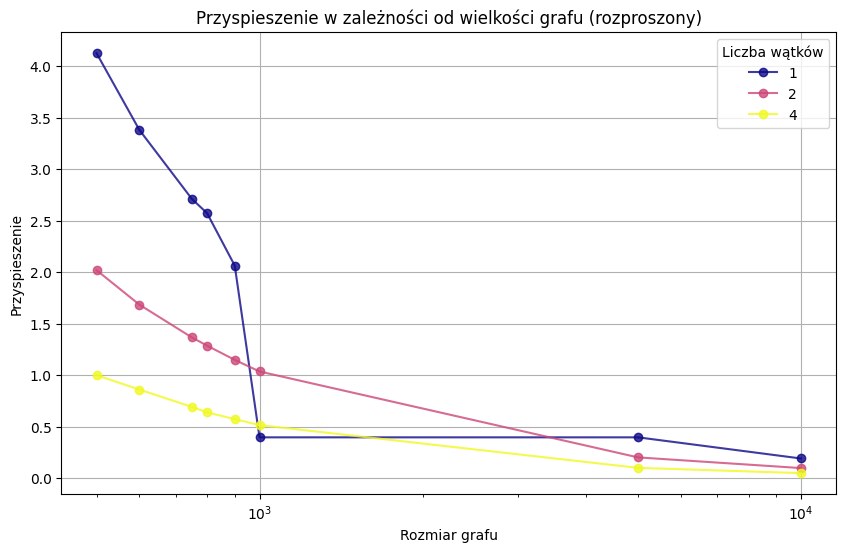

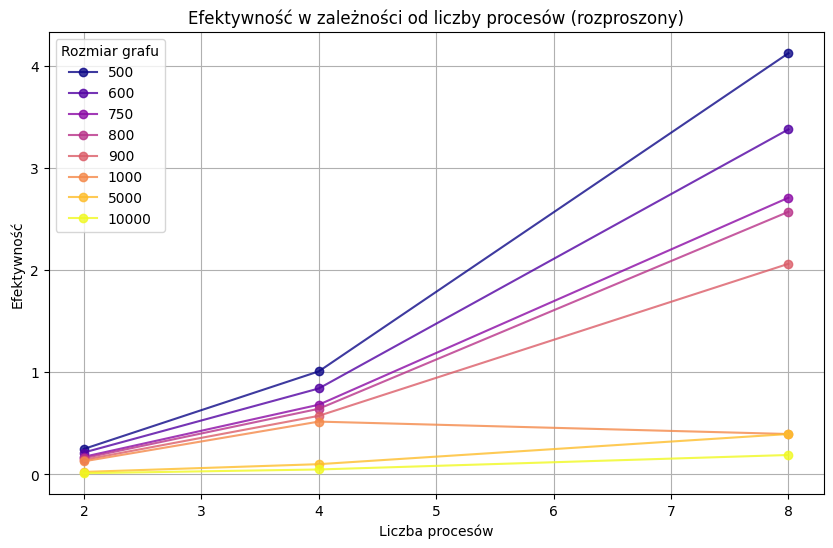

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

df = pd.read_csv("results1.csv")

df["Speedup"] = df.iloc[0]["ExecutionTime"] / df["ExecutionTime"]
df["Efficiency"] = df["Speedup"] / df["Threads"]

def plot_with_distinct_colors(x, y, xlabel, ylabel, title, legend_title, category):
    plt.figure(figsize=(10, 6))
    
    unique_values = sorted(df[category].unique())  
    cmap = cm.plasma  
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_values)-1)  
    colors = [cmap(norm(i)) for i in range(len(unique_values))]  
    
    for i, value in enumerate(unique_values):
        subset = df[df[category] == value]  
        plt.plot(subset[x], subset[y], marker='o', color=colors[i], alpha=0.8)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.legend([f"{value}" for value in unique_values], title=legend_title)
    plt.grid(True)
    plt.show()


def plot_with_distinct_colors1(x, y, xlabel, ylabel, title, legend_title, category):
    plt.figure(figsize=(10, 6))
    
    unique_values = sorted(df[category].unique())  
    cmap = cm.plasma  
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_values)-1) 
    colors = [cmap(norm(i)) for i in range(len(unique_values))]  
    
    for i, value in enumerate(unique_values):
        subset = df[df[category] == value]  
        plt.plot(subset[x], subset[y], marker='o', color=colors[i], alpha=0.8)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.legend([f"{value}" for value in unique_values], title=legend_title)
    plt.grid(True)
    plt.xscale('log')
    plt.show()


# # Wykres 1: Przyspieszenie w zależności od liczby wątków
# plot_with_distinct_colors("Threads", "Speedup", "Liczba wątków", "Przyspieszenie", 
#                           "Przyspieszenie w zależności od liczby wątków (rozproszony)", "Rozmiar grafu", "GraphSize")

# Wykres 2: Przyspieszenie w zależności od liczby procesów
plot_with_distinct_colors("Processes", "Speedup", "Liczba procesów", "Przyspieszenie", 
                          "Przyspieszenie w zależności od liczby procesów (rozproszony)", "Rozmiar grafu", "GraphSize")

# Wykres 3: Przyspieszenie w zależności od wielkości grafu
plot_with_distinct_colors1("GraphSize", "Speedup", "Rozmiar grafu", "Przyspieszenie", 
                          "Przyspieszenie w zależności od wielkości grafu (rozproszony)", "Liczba wątków", "Threads")

# # Wykres 4: Efektywność w zależności od liczby wątków
# plot_with_distinct_colors("Threads", "Efficiency", "Liczba wątków", "Efektywność", 
#                           "Efektywność w zależności od liczby wątków (rozproszony)", "Rozmiar grafu", "GraphSize")

# Wykres 5: Efektywność w zależności od liczby procesów
plot_with_distinct_colors("Processes", "Efficiency", "Liczba procesów", "Efektywność", 
                          "Efektywność w zależności od liczby procesów (rozproszony)", "Rozmiar grafu", "GraphSize")


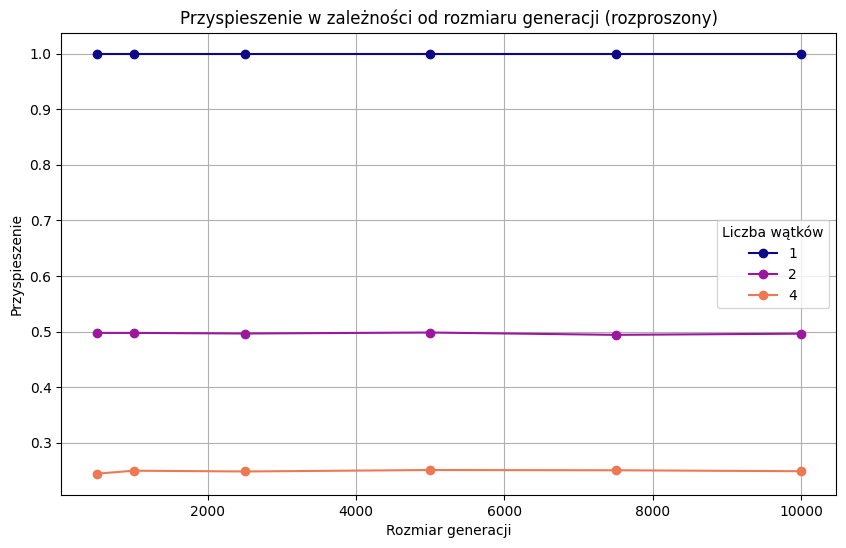

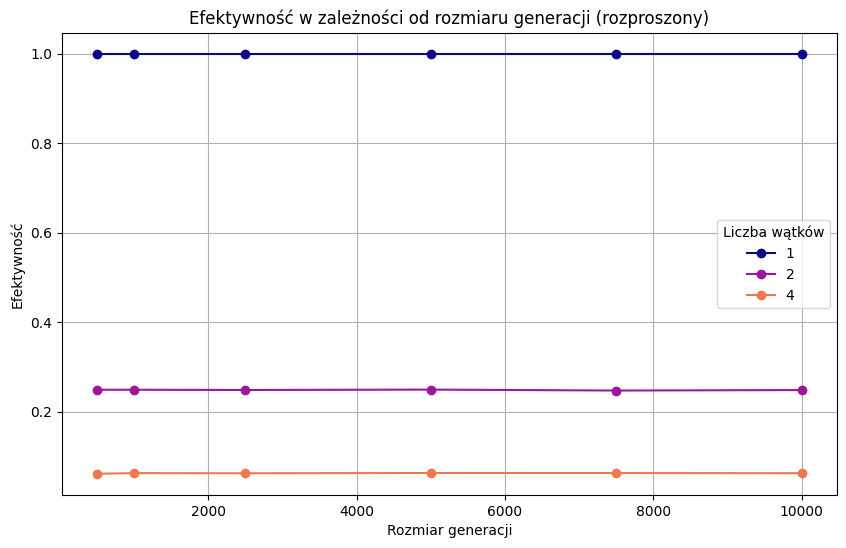

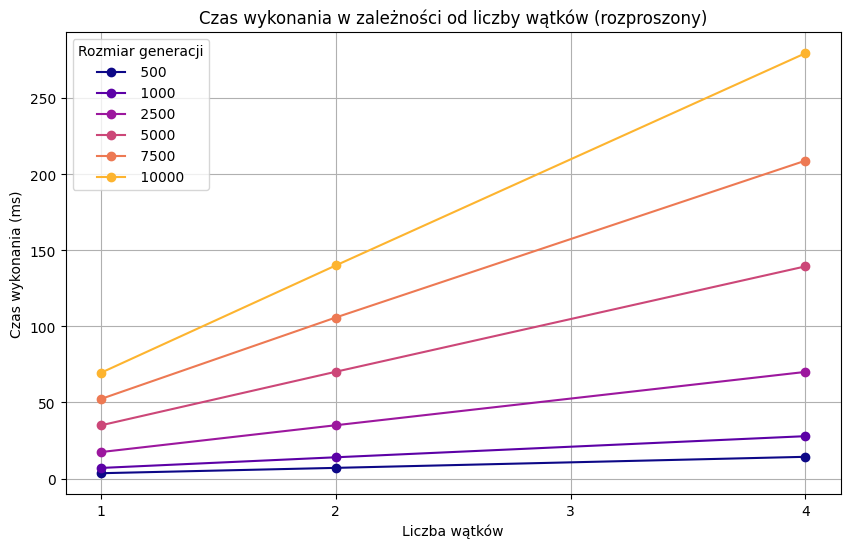

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("results_generation.csv")

df_T1 = df[(df["Processes"] == 8) & (df["Threads"] == 1)][["GenerationSize", "ExecutionTime"]]
df_T1.rename(columns={"ExecutionTime": "T1"}, inplace=True)

df = df.merge(df_T1, on="GenerationSize", how="left")

df["Speedup"] = df["T1"] / df["ExecutionTime"]

df["Efficiency"] = df["Speedup"] / df["Threads"]

# WYKRES 1: Przyspieszenie w zależności od rozmiaru generacji 
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap("plasma")  
for i, threads in enumerate(sorted(df["Threads"].unique())):
    subset = df[df["Threads"] == threads]
    plt.plot(subset["GenerationSize"], subset["Speedup"], marker='o', color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar generacji")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie w zależności od rozmiaru generacji (rozproszony)")
plt.legend([f"{threads}" for threads in sorted(df["Threads"].unique())], title="Liczba wątków", loc="best")
plt.grid(True)
plt.show()

# WYKRES 2: Efektywność w zależności od rozmiaru generacji 
plt.figure(figsize=(10, 6))
for i, threads in enumerate(sorted(df["Threads"].unique())):
    subset = df[df["Threads"] == threads]
    plt.plot(subset["GenerationSize"], subset["Efficiency"], marker='o', color=cmap(i / len(df["Threads"].unique())))

plt.xlabel("Rozmiar generacji")
plt.ylabel("Efektywność")
plt.title("Efektywność w zależności od rozmiaru generacji (rozproszony)")
plt.legend([f"{threads} " for threads in sorted(df["Threads"].unique())], title="Liczba wątków", loc="best")
plt.grid(True)
plt.show()

# WYKRES 3: Czas wykonania w zależności od liczby wątków 
plt.figure(figsize=(10, 6))
for i, generation_size in enumerate(sorted(df["GenerationSize"].unique())):
    subset = df[df["GenerationSize"] == generation_size]
    plt.plot(subset["Threads"], subset["ExecutionTime"], marker='o', color=cmap(i / len(df["GenerationSize"].unique())))

plt.xlabel("Liczba wątków")
plt.ylabel("Czas wykonania (ms)")
plt.title("Czas wykonania w zależności od liczby wątków (rozproszony)")
plt.xticks(np.arange(min(df["Threads"]), max(df["Threads"]) + 1, 1))  
plt.legend([f" {generation_size}" for generation_size in sorted(df["GenerationSize"].unique())], title="Rozmiar generacji", loc="best")
plt.grid(True)
plt.show()

